In [23]:
# Необходмые команды импорта.
import sys
sys.path.append('../physlearn/')
sys.path.append('../source')
import numpy as np
from numpy import linalg as LA
import tensorflow as tf
from matplotlib import pylab as plt
from IPython.display import clear_output
import math_util
%matplotlib inline

# Model Parameters
m = 4500 # размер сеток обучения
M = 4 # количество выходных нейронов(базисных функций)
a = -1000
b = 1000
x_grid = np.linspace(a, b, m, endpoint=True)#.reshape(1, m)

sess = tf.Session()
x = tf.placeholder(tf.double)
trial_func = [tf.sin(x), tf.cos(x), tf.sin(2*x), tf.cos(2*x)]
y_set = [1*tf.sin(x), 0.1*tf.cos(x), 1e-5*tf.sigmoid(x), -3.1*tf.cos(2*x)]
sess.run(tf.initializers.global_variables(), {x:x_grid})


In [20]:
A = tf.transpose(trial_func)
A_T = trial_func
y_0 = tf.reduce_sum(input_tensor=y_set, axis=0)
y = tf.expand_dims(y_0, -1)
omega = tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(A_T, A)), A_T), y)
regression_fit = tf.matmul(tf.transpose(trial_func), omega)
noninvariance_factor = (1 / m) * tf.reduce_sum(tf.square(y - regression_fit))



In [21]:
def plot_all(x_in):
    fig = plt.figure(figsize=(20,10))
    func_set_matrix = sess.run(trial_func, {x:x_in})
    for i in range(M):
        plt.plot(x_in, func_set_matrix[i])
    plt.plot(x_in, sess.run(y_0, {x:x_in}), '--')
    plt.plot(x_in, sess.run(regression_fit, {x:x_in}), '--')

In [9]:
np.array(sess.run(y, {x:x_grid})).shape

(4500, 1)

[ 1.00000000e+00  1.18770909e-01 -2.91260072e-15 -3.09297218e+00]
Nonivariance term:  20.017583336656458


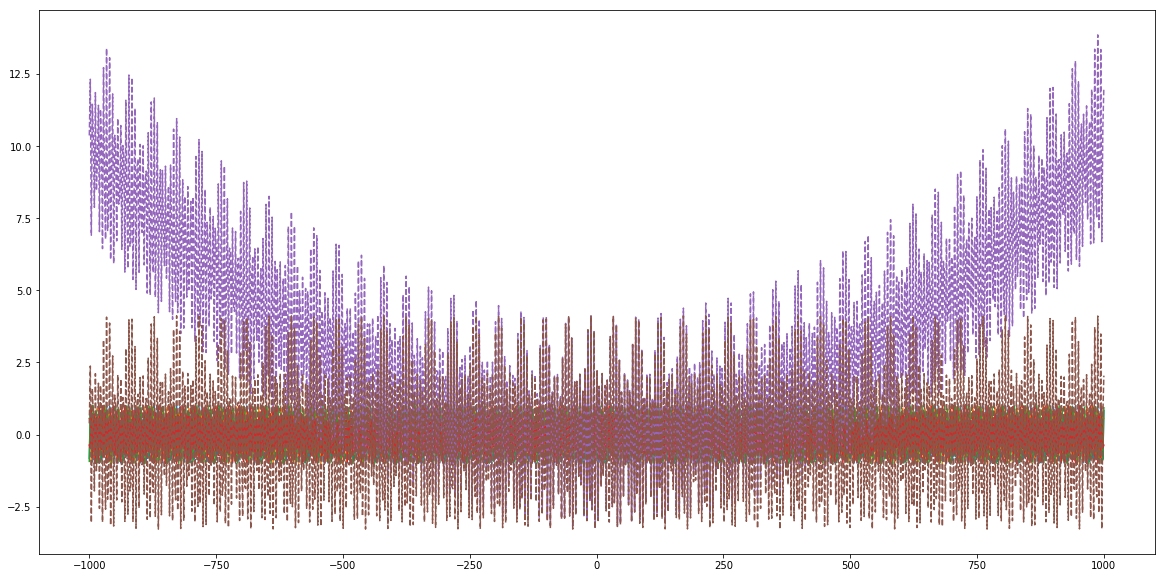

In [22]:
plot_all(np.linspace(-1000, 1000, 1000, endpoint=True))
regression_res = sess.run(omega, {x:x_grid})
print(np.sum(regression_res, axis=-1))
print('Nonivariance term: ', sess.run(noninvariance_factor, {x:x_grid}))